In [229]:
import pandas as pd
import matplotlib.pyplot as plt

In [230]:
df = pd.read_pickle('extraction_pipeline/agreement_features_join_projects.pkl')
df_sectors = pd.read_pickle('classification/predicted_sectors_2.pkl')
df = df.join(df_sectors[['id', 'predicted_sector']].set_index('id'), on = 'id')
df['date'] = pd.to_datetime(df['date'])

In [231]:
df['currency_standard'].unique()

array(['us dollar', '', 'dem', 'french francs', 'yen', 'euro',
       'egyptian pounds', 'gbp'], dtype=object)

In [232]:
currency_map = {'us dollar': 'USD', 'euro': 'EUR', 'dem': 'DEM', 
                'french francs': 'FRF', 'gbp': 'GBP', 'egyptian pounds': 'EGP', 'yen': 'JPY'}
def get_stand_curr(x):
    try:
        return currency_map[x]
    except:
        return None
df['cur_usd'] = df['currency_standard'].apply(get_stand_curr)
# df = df[~df['cur_usd'].isin(['EGP'])]
df['cur_usd'].unique()

array(['USD', None, 'DEM', 'FRF', 'JPY', 'EUR', 'EGP', 'GBP'],
      dtype=object)

In [233]:
from currency_converter import CurrencyConverter
c = CurrencyConverter(fallback_on_missing_rate=True)

In [234]:
df.head()

,id,date,country_code,country_name,named_countries,Project Name,project_desc,amount_standard,currency_standard,closing_month,closing_day,closing_year,loan_length in year,wb_project_id,major_sector_name,sector1_name,sector2_name,sector3_name,predicted_sector,cur_usd
0,658601468273303198,1990-01-05,jo,Jordan,"[Jordan, United States]",Industry and Trade Policy Adjustment Loan,SCHEDULE 1\n\n Withdrawal of the Procee...,150000000.0,us dollar,December,31,1992,2.0,None,NaN,NaN,NaN,NaN,Industry and Trade/Services,USD
1,784351468234894668,1990-01-10,br,Brazil,"[Brazil, United States]",Third Agricultural Research Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,47000000.0,us dollar,June,30,1995,5.0,None,NaN,NaN,NaN,NaN,Agriculture,USD
2,891941468049466312,1990-01-11,ma,Malaysia,"[Malaysia, United States]",Rubber Industry Smallholders\n Deve...,SCHEDULE 2\n\n Description of the...,71000000.0,us dollar,December,31,1993,3.0,None,NaN,NaN,NaN,NaN,Agriculture,USD
3,125511468051878371,1990-01-11,ma,Malaysia,"[Malaysia, United States]",Highway Rehabilitation and Improvement Project,SCHEDULE 2\n\n Description of the...,83200000.0,us dollar,June,30,1995,5.0,P099112,Transportation,Rural and Inter-Urban Roads,Sub-National Government,NaN,Transportation,USD
4,733341468033245855,1990-01-16,ivc,Cote d'Ivoire,[United States],Abidjan Environmental Protection Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,21900000.0,us dollar,December,31,1993,3.0,None,NaN,NaN,NaN,NaN,Public Admin,USD


In [235]:
def get_usd(x):
    try:
        return c.convert(x['amount_standard'], x['cur_usd'], 'USD', x['date'])
    except:
        return None
df['amount_cur_usd'] = df.apply(get_usd, axis = 1)

In [236]:
df[df.amount_cur_usd.notna()].head()

,id,date,country_code,country_name,named_countries,Project Name,project_desc,amount_standard,currency_standard,closing_month,...,closing_year,loan_length in year,wb_project_id,major_sector_name,sector1_name,sector2_name,sector3_name,predicted_sector,cur_usd,amount_cur_usd
1243,392401468231871368,1999-01-20,hr,Croatia,"[Germany, Croatia, United States]",Railway Modernization and Restructuring Project,SCHEDULE 2 \n\nDescription of the Project\n\nT...,85400000.0,euro,June,...,2003,4.0,P039161,Transportation,Railways,Social Protection,NaN,Transportation,EUR,98850500.0
1244,285271468095363256,1999-01-20,ro,Romania,"[Bulgaria, Romania, United States]",Social Development Fund Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,10000000.0,us dollar,June,...,2002,3.0,P008204,Health,Health,Early Childhood Education,Central Government (Central Agencies),Health,USD,10000000.0
1245,738661468332674245,1999-01-21,pak,Pakistan,"[Pakistan, United States]",Structural Adjustment Loan,SCHEDULE 1\n\nExcluded Expenditures\n\nFor pur...,350000000.0,us dollar,June,...,1999,0.0,None,NaN,NaN,NaN,NaN,Financial Sector,USD,350000000.0
1246,469841468295188118,1999-01-29,in,India,"[India, United States]",Andhra Pradesh Economic Restructuring Project,None,301300000.0,us dollar,March,...,2004,5.0,None,NaN,NaN,NaN,NaN,NaN,USD,301300000.0
1247,617561468256168053,1999-02-04,in,India,"[India, United States]",Andhra Pradesh Economic Restructuring Project,None,301300000.0,us dollar,March,...,2004,5.0,None,NaN,NaN,NaN,NaN,NaN,USD,301300000.0


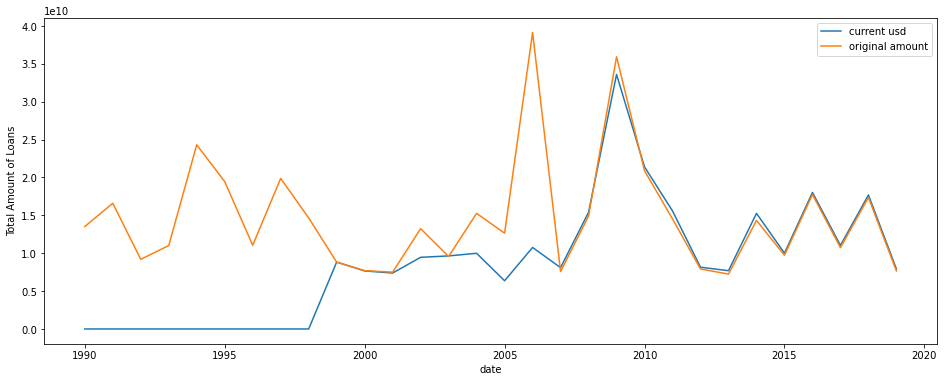

In [237]:
plt.figure(figsize = (16,6))
df.groupby(df.date.dt.year)['amount_cur_usd'].sum().plot(label = 'current usd')
df.groupby(df.date.dt.year)['amount_standard'].sum().plot(label = 'original amount' )
plt.ylabel('Total Amount of Loans')
plt.legend()

In [238]:
# Get Country Code
df_ct = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
country_map = {}
for i in range(len(df_ct)):
    country_name, country_code = df_ct.loc[i,'COUNTRY'], df_ct.loc[i,'CODE']
    country_map[country_name] = country_code
    
country_map['Korea'] = country_map['Korea, South']
country_map["People's Republic of the Congo"] = country_map['Congo, Republic of the']
country_map["Congo"] = country_map['Congo, Democratic Republic of the']
country_map['Cape Verde'] = country_map['Cabo Verde']
country_map["Côte d'Ivoire"] = country_map["Cote d'Ivoire"]
country_map['Venezuela, Bolivarian Republic of'] = country_map["Venezuela"]
country_map['Bolivia, Plurinational State of'] = country_map["Bolivia"]
country_map['Viet Nam'] = country_map["Vietnam"]
country_map['Yugoslavia'] = country_map['Macedonia']
country_map['Macedonia, the former Yugoslav Republic of'] = country_map['Macedonia']
country_map['Moldova, Republic of'] = country_map['Moldova']
country_map['Russian Federation'] = country_map['Russia']
country_map['Slovak Republic'] = country_map['Slovakia']
country_map['Iran, Islamic Republic of'] = country_map['Iran']

def get_country_code(x):
    try:
        return country_map[x]
    except:
        return None
    
df['country_code_'] = df['country_name'].apply(get_country_code)

In [239]:
import plotly.graph_objects as go
import pandas as pd

# dff = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

def plot_heatmap(dff):
    fig = go.Figure(data=go.Choropleth(
        locations = dff['country_code_'],
        z = dff['amount sum'],
        text = dff['country_name'],
        colorscale = 'Oranges',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '$',
        colorbar_title = 'Total Loan Amount<br>Billions current US$',
    ))

    fig.update_layout(
        title_text='World Bank (IBRD) Loans 1990-2019',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='Source: <a href="https://github.com/xushuo0/Qarik-Project">\
                Qurik-Project (May 28, 2021)</a>',
            showarrow = False
        )]
    )
    fig.show()

In [240]:
dff = df.groupby(['country_name', 'country_code_'])['amount_cur_usd'].sum().reset_index(name = 'amount sum').sort_values(by='amount sum', ascending = False)

In [241]:
dff.head()

,country_name,country_code_,amount sum
44,India,IND,3.111331e+10
14,Brazil,BRA,2.237138e+10
19,China,CHN,2.156715e+10
96,Turkey,TUR,1.899606e+10
45,Indonesia,IDN,1.585007e+10


In [242]:
plot_heatmap(dff.dropna())

In [244]:
df

,id,date,country_code,country_name,named_countries,Project Name,project_desc,amount_standard,currency_standard,closing_month,...,loan_length in year,wb_project_id,major_sector_name,sector1_name,sector2_name,sector3_name,predicted_sector,cur_usd,amount_cur_usd,country_code_
0,658601468273303198,1990-01-05,jo,Jordan,"[Jordan, United States]",Industry and Trade Policy Adjustment Loan,SCHEDULE 1\n\n Withdrawal of the Procee...,150000000.0,us dollar,December,...,2.0,None,NaN,NaN,NaN,NaN,Industry and Trade/Services,USD,NaN,JOR
1,784351468234894668,1990-01-10,br,Brazil,"[Brazil, United States]",Third Agricultural Research Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,47000000.0,us dollar,June,...,5.0,None,NaN,NaN,NaN,NaN,Agriculture,USD,NaN,BRA
2,891941468049466312,1990-01-11,ma,Malaysia,"[Malaysia, United States]",Rubber Industry Smallholders\n Deve...,SCHEDULE 2\n\n Description of the...,71000000.0,us dollar,December,...,3.0,None,NaN,NaN,NaN,NaN,Agriculture,USD,NaN,MYS
3,125511468051878371,1990-01-11,ma,Malaysia,"[Malaysia, United States]",Highway Rehabilitation and Improvement Project,SCHEDULE 2\n\n Description of the...,83200000.0,us dollar,June,...,5.0,P099112,Transportation,Rural and Inter-Urban Roads,Sub-National Government,NaN,Transportation,USD,NaN,MYS
4,733341468033245855,1990-01-16,ivc,Cote d'Ivoire,[United States],Abidjan Environmental Protection Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,21900000.0,us dollar,December,...,3.0,None,NaN,NaN,NaN,NaN,Public Admin,USD,NaN,CIV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,876531576597901004,2019-12-04,br,Brazil,[United States],SABESP - Improving Water Service Access and Se...,SCHEDULE1\n\nProject Description\n\nThe object...,250000000.0,us dollar,June,...,6.0,None,NaN,NaN,NaN,NaN,Water/Sanitation/Waste,USD,250000000.0,BRA
3191,430041576700944955,2019-12-05,ke,Kenya,"[Kenya, United States]",Affordable Housing Finance Project,SCHEDULE 1\n\nProject Description\n\nThe objec...,219000000.0,euro,June,...,5.0,P165034,Financial Sector,Banking Institutions,Housing Construction,"Public Administration - Industry, Trade and Se...",Financial Sector,EUR,242958600.0,KEN
3192,915561578948029352,2019-12-09,yf,Serbia,"[Serbia, United States]",Competitive Agriculture Project,SCHEDULE 1 \n\nProject Description \n\nThe obj...,45800000.0,euro,December,...,5.0,None,NaN,NaN,NaN,NaN,Agriculture,EUR,50723500.0,SRB
3193,701581579789087668,2019-12-10,do,Dominican Republic,"[Dominica, United States]",Additional Financing for the Support to the Na...,SCHEDULE 1 \n\nProject Description \n\nThe Pro...,NaN,,September,...,3.0,P167815,Education,Public Administration - Education,Primary Education,Secondary Education,Education,None,NaN,DOM


In [245]:
df.to_pickle('extraction_pipeline/agreement_features_join_projects.pkl')